In [2]:
bbox = [
    -121.01945495605469,
    36.923547681089296,
    -120.96349334716797,
    36.966626538480384
]

start_date = '2019-01-01'
end_date = '2019-11-02'

In [3]:
timerange = f'{start_date}/{end_date}'

In [6]:
import pystac_client

URL = "https://earth-search.aws.element84.com/v0"
catalog = pystac_client.Client.open(URL)

In [12]:
%time

items = catalog.search(
    bbox=bbox,
    datetime=timerange,
    collections=['sentinel-s2-l2a-cogs']
).get_all_items()
len(items)


CPU times: total: 0 ns
Wall time: 0 ns


248

In [15]:
import stackstac as ss

stack = ss.stack(items)

In [17]:
lowcloud = stack[stack["eo:cloud_cover"] < 10]

In [18]:
rgb = lowcloud.sel(band=["B04", "B03", "B02"])

In [19]:
monthly = rgb.resample(time="MS").median("time", keep_attrs=True)

c:\Users\geo1k\AppData\Local\pypoetry\Cache\virtualenvs\stac-cube-QEULhkrT-py3.10\lib\site-packages\dask\array\core.py:1761: PerformanceWarning: Increasing number of chunks by factor of 18
  return da_func(*args, **kwargs)


In [20]:
monthly

,Array,Chunk
Bytes,56.63 GiB,5.33 MiB
Shape,"(11, 3, 20976, 10980)","(1, 1, 836, 836)"
Count,52 Graph Layers,223905 Chunks
Type,float64,numpy.ndarray


In [22]:

coords = bbox[0:2]
coords

[-121.01945495605469, 36.923547681089296]

In [23]:
import pyproj

In [24]:
x_utm, y_utm = pyproj.Proj(monthly.crs)(bbox[0], bbox[1])
buffer = 1000  # meters

In [25]:
aoi = monthly.loc[..., y_utm+buffer:y_utm-buffer, x_utm-buffer:x_utm+buffer]

In [29]:
aoi[0]

<xarray.DataArray 'stackstac-0e24fa8e871f127350ad8a7b1ffec4d3' (band: 3,
                                                                y: 200, x: 200)>
dask.array<getitem, shape=(3, 200, 200), dtype=float64, chunksize=(1, 186, 200), chunktype=numpy.ndarray>
Coordinates: (12/16)
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 6.754e+05 6.754e+05 ... 6.774e+05
  * y                       (y) float64 4.089e+06 4.089e+06 ... 4.087e+06
    sentinel:utm_zone       int32 10
    instruments             <U3 'msi'
    sentinel:latitude_band  <U1 'S'
    ...                      ...
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int32 32610
    time                    datetime64[ns] 2019-01-01
Attributes:
    spec:        RasterSpec(epsg=32610, bounds=(600000.0, 3990240.0, 709800.0...
    crs:         epsg:32610
    transform:   | 10.00, 0.00, 600000.00|\n| 0.00,-10.00, 4200000.00|\n| 0.0...
    resolution:  10.0

In [30]:
import dask.diagnostics

with dask.diagnostics.ProgressBar():
    data = aoi[:2].compute()

[########################################] | 100% Completed | 35.42 s


In [31]:
data

<xarray.DataArray 'stackstac-0e24fa8e871f127350ad8a7b1ffec4d3' (time: 2,
                                                                band: 3,
                                                                y: 200, x: 200)>
array([[[[554., 594., 599., ..., 503., 496., 547.],
         [491., 499., 498., ..., 487., 492., 511.],
         [460., 460., 458., ..., 516., 511., 518.],
         ...,
         [401., 458., 572., ..., 680., 640., 655.],
         [458., 509., 489., ..., 711., 672., 700.],
         [511., 528., 536., ..., 702., 714., 752.]],

        [[861., 892., 911., ..., 597., 576., 640.],
         [789., 827., 824., ..., 608., 558., 581.],
         [699., 770., 786., ..., 645., 597., 578.],
         ...,
         [482., 523., 587., ..., 843., 736., 672.],
         [527., 604., 645., ..., 835., 788., 750.],
         [703., 680., 716., ..., 863., 830., 811.]],

        [[410., 436., 474., ..., 341., 355., 389.],
         [400., 374., 431., ..., 340., 323., 376.],
         [379., 358., 383., ..., 372., 339., 358.],
         ...,
...
         ...,
         [382., 441., 454., ..., 642., 598., 575.],
         [436., 472., 468., ..., 717., 703., 669.],
         [489., 486., 503., ..., 705., 699., 709.]],

        [[779., 788., 797., ..., 550., 541., 599.],
         [713., 767., 789., ..., 565., 539., 547.],
         [684., 771., 766., ..., 602., 579., 561.],
         ...,
         [537., 598., 627., ..., 862., 754., 705.],
         [605., 653., 728., ..., 900., 814., 814.],
         [738., 706., 811., ..., 883., 867., 844.]],

        [[309., 353., 330., ..., 277., 275., 297.],
         [310., 308., 330., ..., 304., 297., 294.],
         [328., 296., 317., ..., 322., 322., 308.],
         ...,
         [284., 309., 317., ..., 434., 443., 423.],
         [360., 362., 341., ..., 459., 464., 450.],
         [367., 367., 358., ..., 461., 477., 448.]]]])
Coordinates: (12/16)
  * band                    (band) <U8 'B04' 'B03' 'B02'
  * x                       (x) float64 6.754e+05 6.754e+05 ... 6.774e+05
  * y                       (y) float64 4.089e+06 4.089e+06 ... 4.087e+06
    sentinel:utm_zone       int32 10
    instruments             <U3 'msi'
    sentinel:latitude_band  <U1 'S'
    ...                      ...
    title                   (band) <U31 'Band 4 (red)' ... 'Band 2 (blue)'
    common_name             (band) object 'red' 'green' 'blue'
    center_wavelength       (band) object 0.6645 0.56 0.4966
    full_width_half_max     (band) object 0.038 0.045 0.098
    epsg                    int32 32610
  * time                    (time) datetime64[ns] 2019-01-01 2019-02-01
Attributes:
    spec:        RasterSpec(epsg=32610, bounds=(600000.0, 3990240.0, 709800.0...
    crs:         epsg:32610
    transform:   | 10.00, 0.00, 600000.00|\n| 0.00,-10.00, 4200000.00|\n| 0.0...
    resolution:  10.0

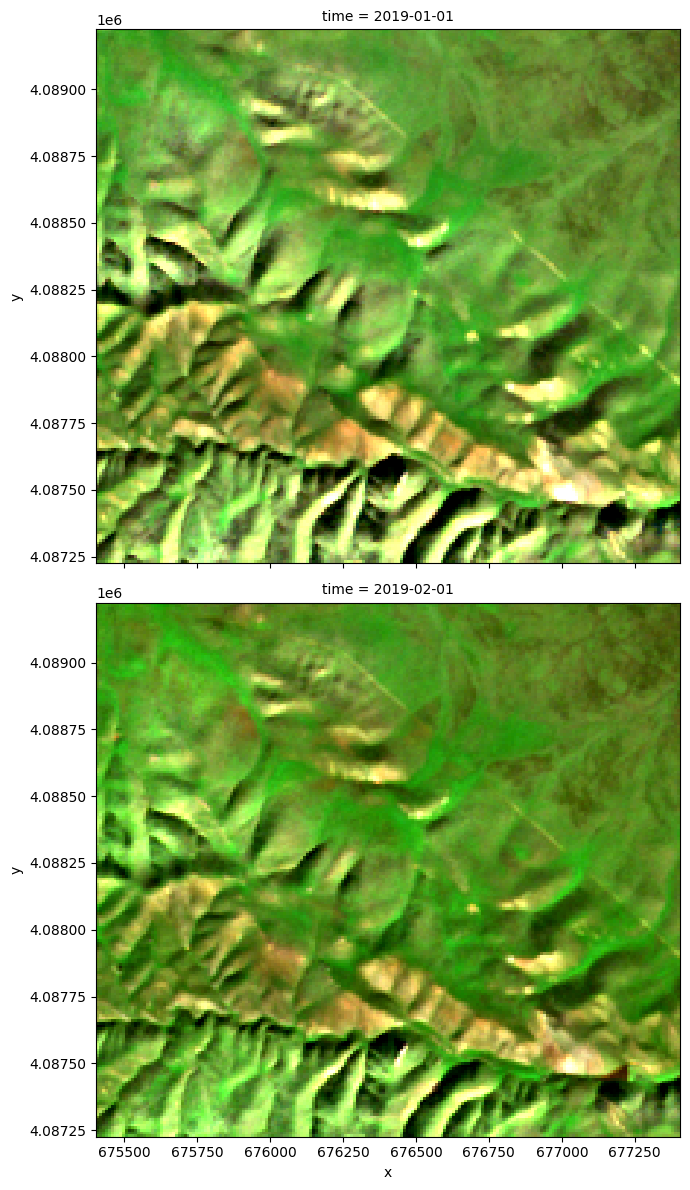

In [32]:
data.plot.imshow(row="time", rgb="band", robust=True, size=6);